# Q1. Tumour Classification
# a. Obtain the “Breast Cancer Wisconsin (Diagnostic) Data Set”
# ii. Use programming method to directly get data from website.


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cancer_data = fetch_ucirepo(id=17)

# data (as pandas dataframes) Split into features (X) and target (y)
X = cancer_data.data.features
y = cancer_data.data.targets

# metadata
print("Metadata: ",cancer_data.metadata)

# variable information
print("Variables Info:",cancer_data.variables)


Metadata:  {'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None

In [ ]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

# b. Visualize and comment on the nature of data.  
# i. Consider using different plots.  
# ii. Demonstrate your productivity (All visualization-based tools are   
# allowed)

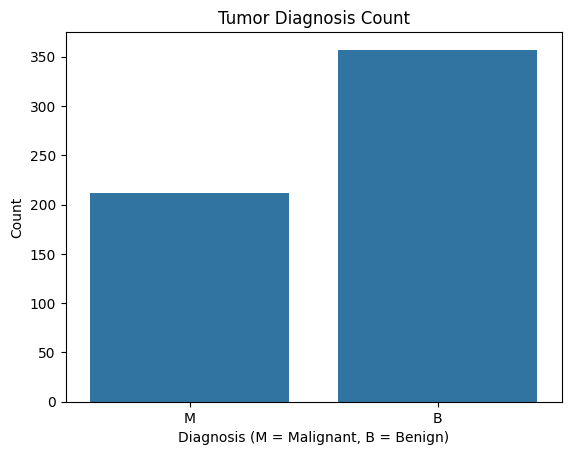

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = cancer_data.data.features.copy()
df['Diagnosis'] = cancer_data.data.targets['Diagnosis']

sns.countplot(x = 'Diagnosis', data=df)
plt.title('Tumor Diagnosis Count')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()

📌 **Observation: Tumor Diagnosis Distribution**

The count plot shows a bar,in which In this dataset, the categories are:

B = Benign tumor (non-cancerous)

M = Malignant tumor (cancerous)
The dataset displays more benign (B) cases than malignant (M) ones. This indicates a **class imbalance**, which is important to consider when training machine learning models especially for evaluation metrics like accuracy, precision, and recall. Need to use techniques like stratified sampling or balanced metrics.


In [ ]:
#plotting histogram to show how features are displayed
df.info()
#we must skip diagnosis  for numeric feature visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

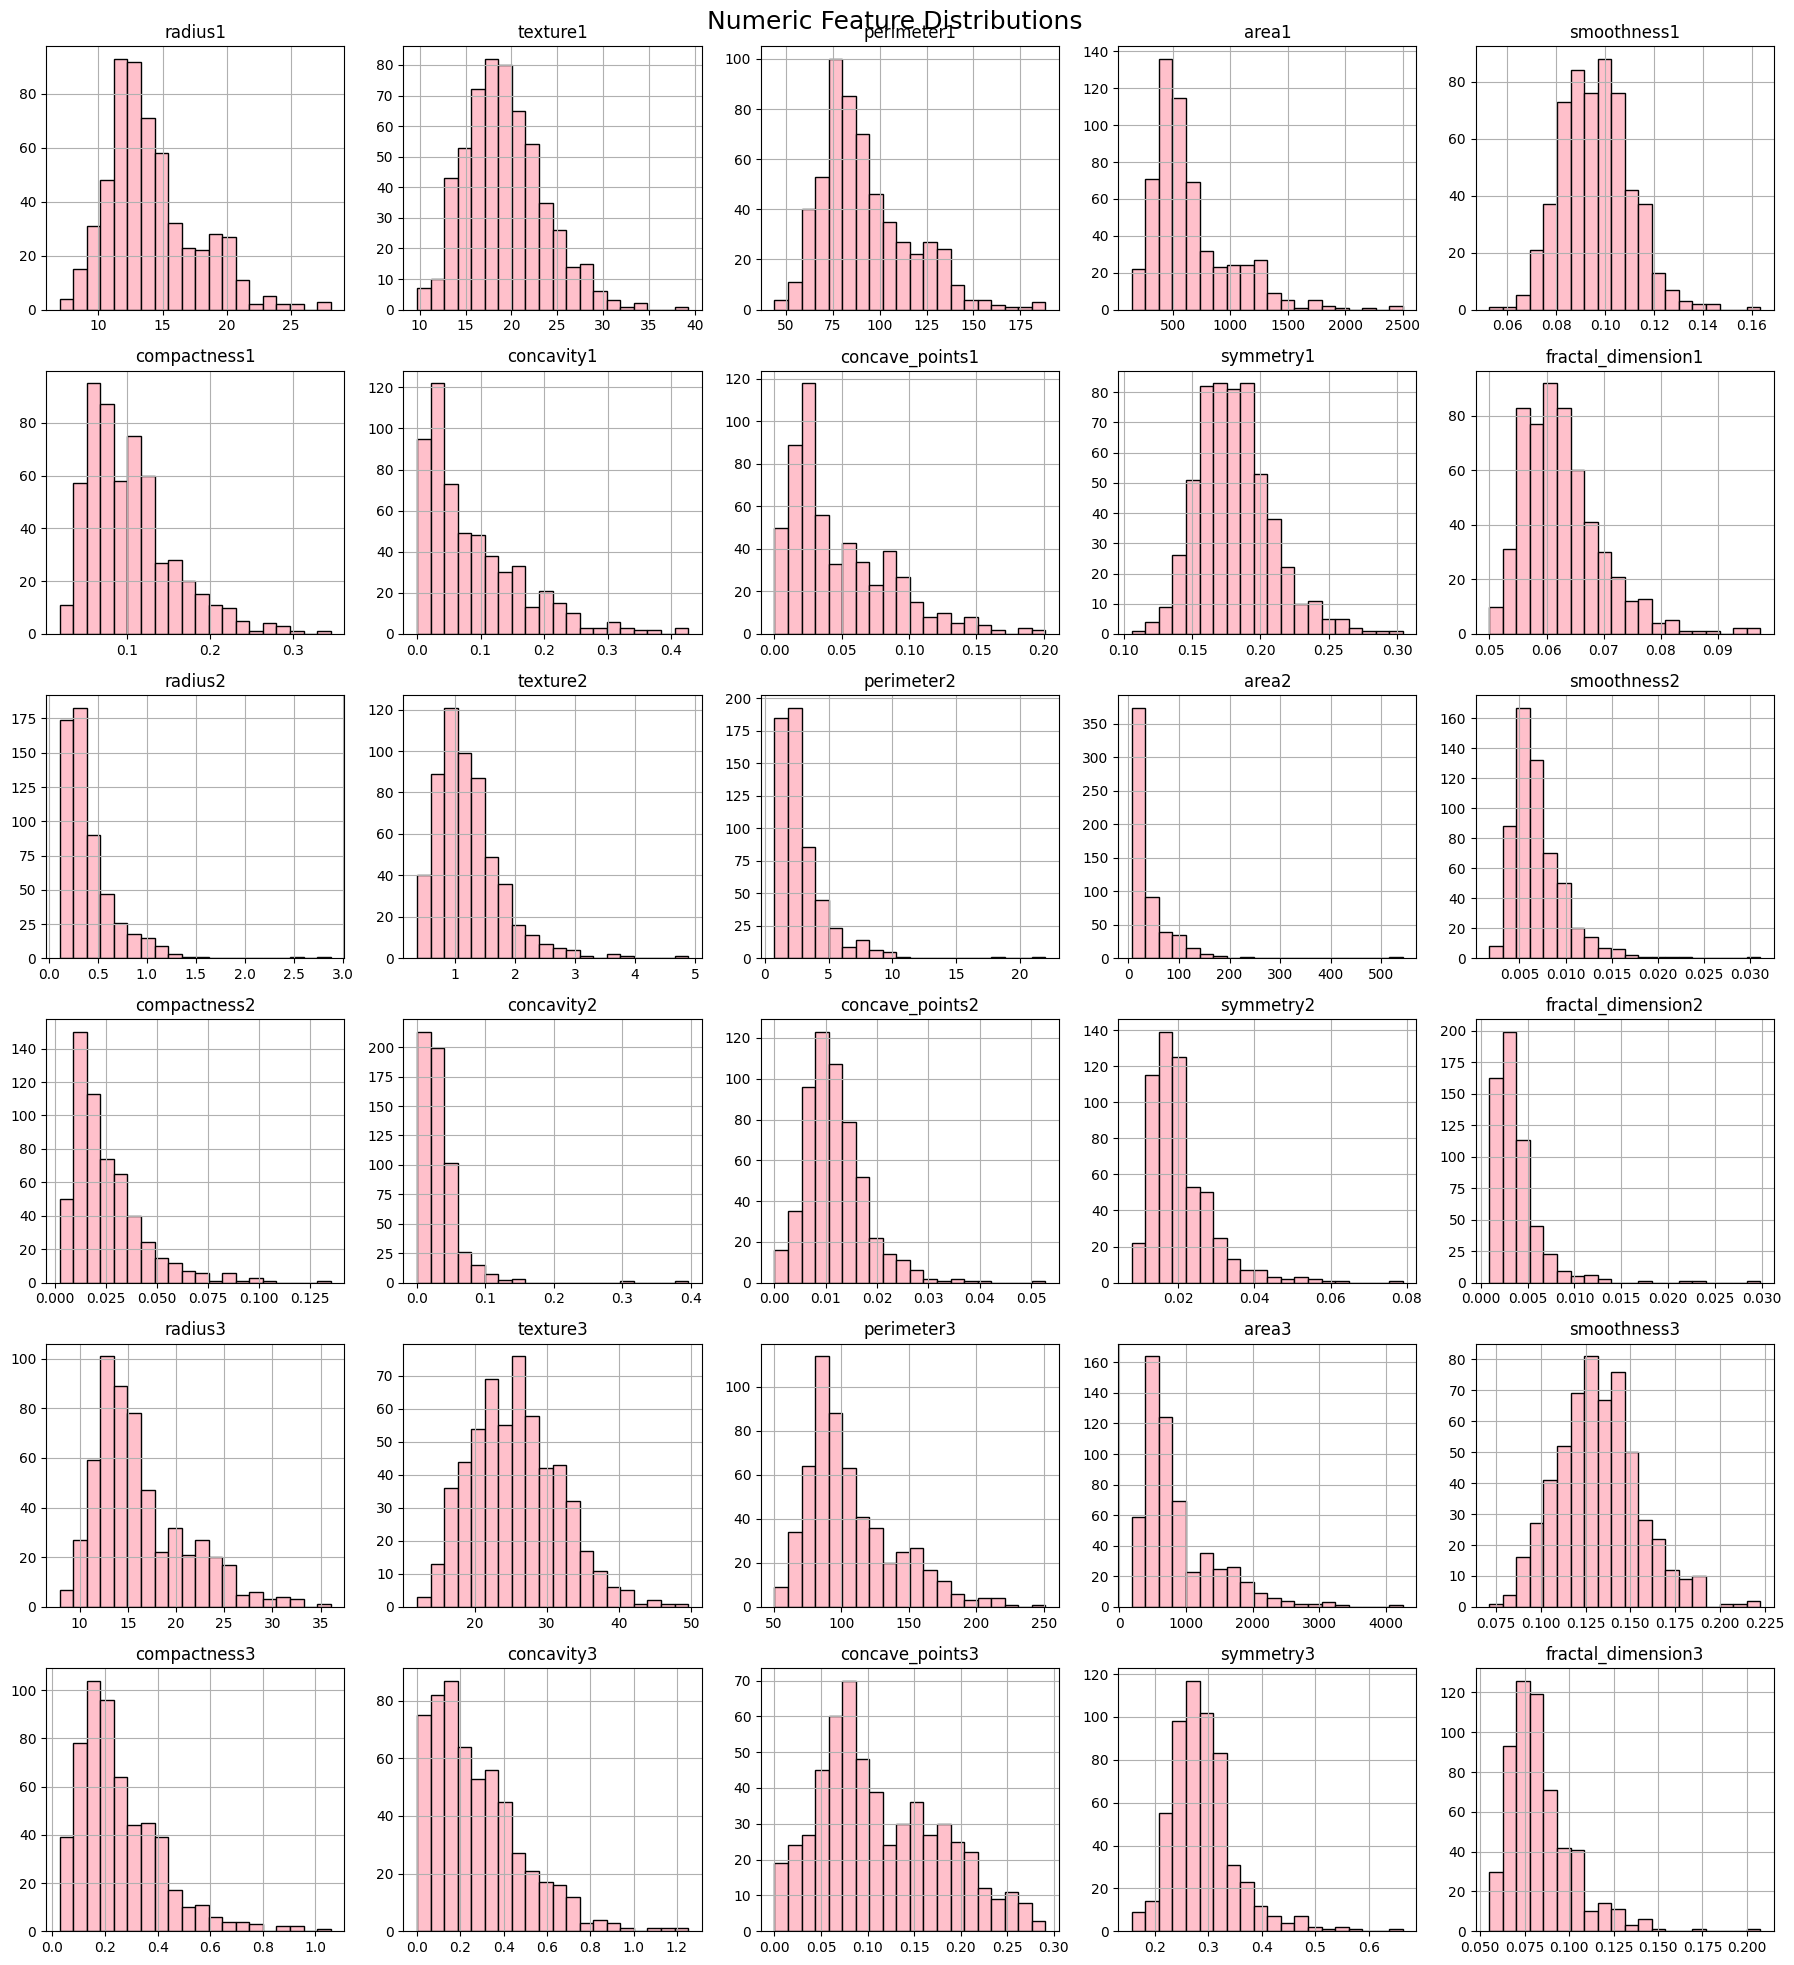

In [ ]:
numeric_features = df.drop(['Diagnosis'],axis=1)
numeric_features.hist(figsize=(18, 20),bins = 20,edgecolor='black',color='pink')
plt.suptitle('Numeric Feature Distributions',fontsize=18)
plt.tight_layout()
plt.show()


📌 **Observation: Feature Histograms**

Most features show a **right-skewed distribution** (e.g., area, radius, perimeter), meaning there are a few high-value outliers. Others are more uniformly or normally distributed. This suggests that we may need to apply **scaling or normalization** for models like SVM or KNN to perform well.
Some features also have similar shapes, hinting at **high correlation**.


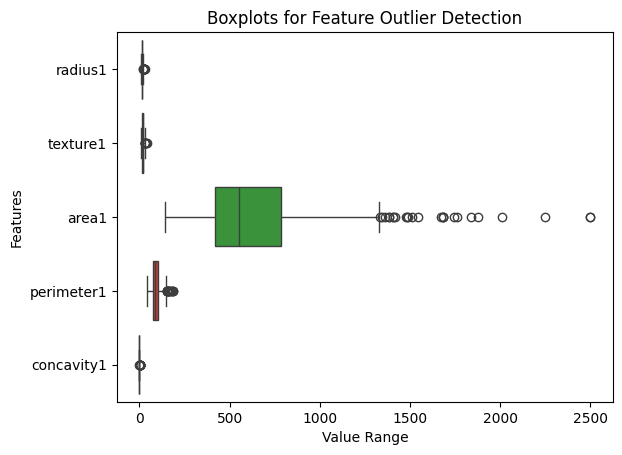

In [ ]:
#boxplot for outlier detection of numerical features
# plt.figure(figsize=(20, 10))
# sns.boxplot(data=df.drop(['Diagnosis'], axis=1), orient='h')
# plt.title('Boxplots for Feature Outlier Detection')
# plt.xlabel('Value Range')
# plt.ylabel('Features')
# plt.show()
#the original boxplot showing all the features is crowded
#showing only selected features
selected_features = ['radius1', 'texture1', 'area1', 'perimeter1', 'concavity1']
sns.boxplot(data=df[selected_features],orient ='h')
plt.title('Boxplots for Feature Outlier Detection')
plt.xlabel('Value Range')
plt.ylabel('Features')
plt.show()

📌 **Observation: Boxplots of Selected Features**

By focusing on mean-based features, we observe that `area1` and `perimeter1` show the highest range and contain clear outliers. These could influence certain machine learning models, especially ones sensitive to feature scale. The other features are more compact but still show some skewness, indicating the potential benefit of normalization or robust scaling.


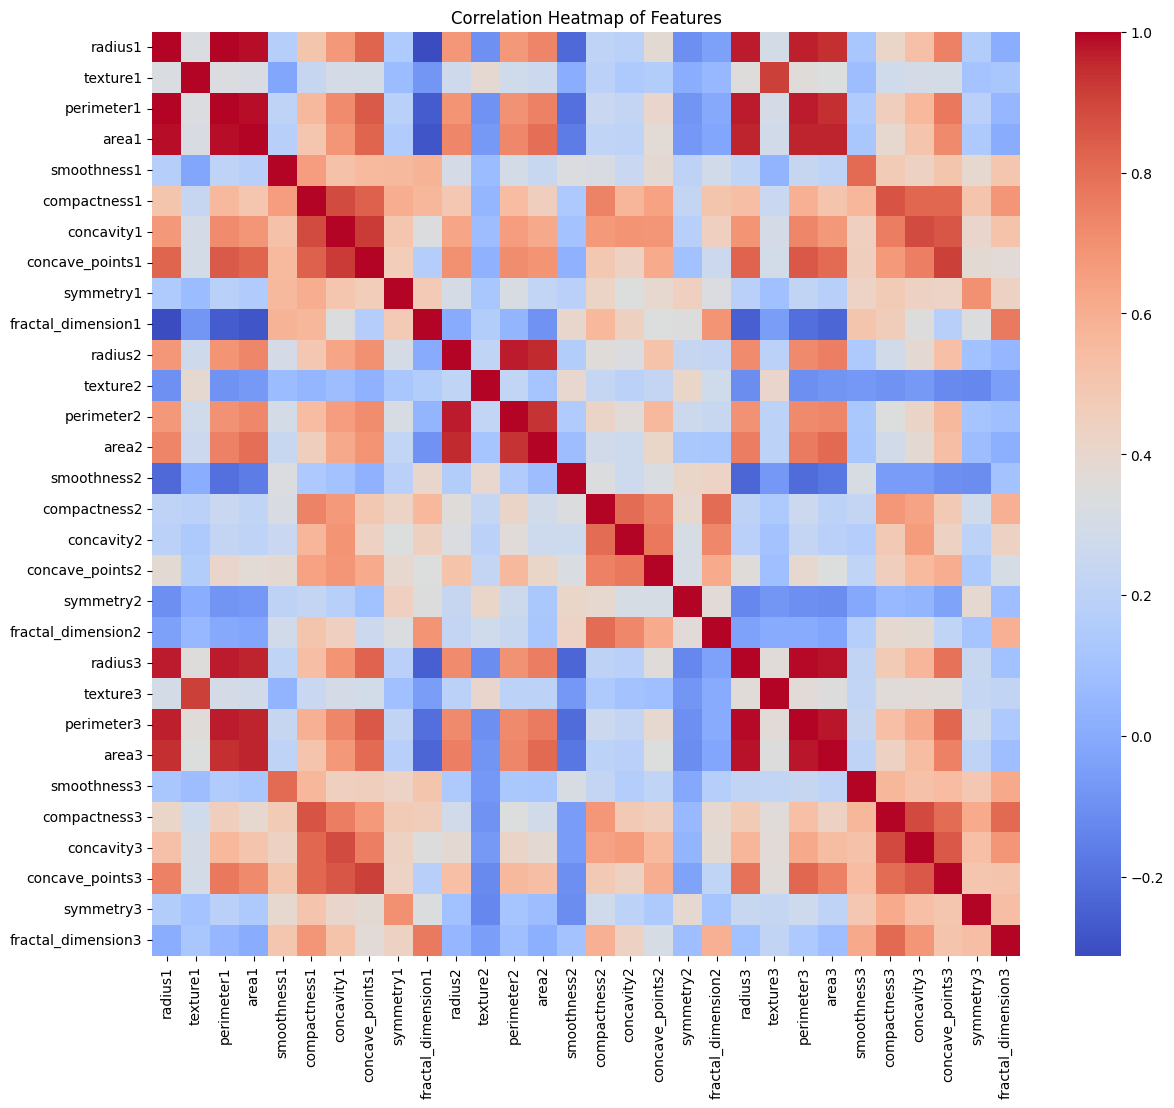

In [ ]:
#plotting correlation heatmap to see redundancy in features
plt.figure(figsize=(14,12))
numeric_df= df.select_dtypes(include=['float64','int64'])
corr = numeric_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

📌 **Observation: Correlation Heatmap of Breast Cancer Features**

The correlation heatmap reveals strong and meaningful relationships among certain groups of features:

- 🔴 `radius1`, `perimeter1`, and `area1` show **very high positive correlation** (values close to 1.0). This suggests these variables are essentially capturing the same size-related tumor characteristics.
- 🔴 Similar strong correlations are observed among the `radius3`, `perimeter3`, and `area3` features (worst-case values), reinforcing the trend that size-based features are consistently related.
- 🟠 `concavity1`, `concave_points1`, and `compactness1` are also strongly correlated with each other — these capture shape complexity and edge sharpness of the tumor.
- 🔵 In contrast, features like `fractal_dimension1`, `smoothness2`, and `symmetry2` have weak or no significant correlation with the dominant size/shape features — they likely represent more independent characteristics.
- 🔁 Features with suffixes `1`, `2`, and `3` (mean, standard error, worst) tend to correlate within their group, especially the `1` and `3` features.

📌 **Conclusion**:
This heatmap clearly shows **multicollinearity**, especially among tumor size and shape descriptors. This insight justifies the application of **dimensionality reduction techniques like PCA** to avoid redundancy and reduce model complexity, while retaining essential information.


# c. Pen down your intuitions and provide a brief analytical summary of data.  
# i. Provide outlier analysis.  
# ii. Provide data analysis.  
# iii. Perform principal component analysis (PCA).  
# iv. Obtain train-test-validation data.  

In [ ]:
# i,ii written in report

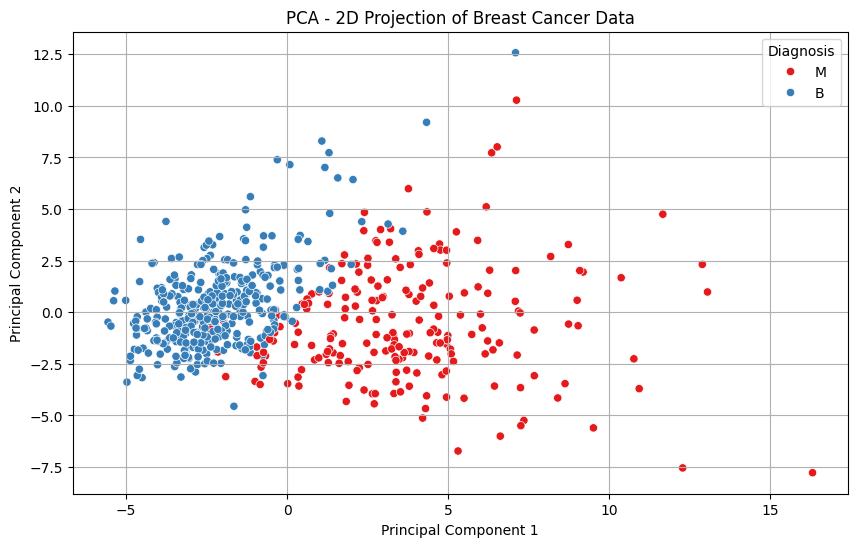

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Separate features and target
X = df.drop(['Diagnosis'], axis=1)  # X = All numeric features
y = df['Diagnosis']  # y = Target variable (B or M)

# StandardScaler standardizes features to have mean = 0 and std = 1, important for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components Reduces 30 features down to 2 principal components these 2 new features explain the most variance (i.e., most of the useful information)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Diagnosis'] = y.values

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Diagnosis', palette='Set1')
plt.title('PCA - 2D Projection of Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and temp
# 30% of the data into a temporary set (X_temp, y_temp)
# remaining 70% is used for training
# stratify=y keeps the class balance (same ratio of benign/malignant)
# random_state=42 ensures reproducibility

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Step 2: Split temp into validation and test (each 15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Display split sizes
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Training set: (398, 30)
Validation set: (85, 30)
Test set: (86, 30)


# d. Train the following classification models:  
i. Logistic Regression  
ii. Decision Tree  
iii. k – Nearest Neighbour  
iv. Support Vector Machine  
v. Naïve Bayes  
vi. Random Forest  
vii. Extra Tree  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_val)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

Logistic Regression
Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

           B       0.91      1.00      0.95        53
           M       1.00      0.84      0.92        32

    accuracy                           0.94        85
   macro avg       0.96      0.92      0.94        85
weighted avg       0.95      0.94      0.94        85

[[53  0]
 [ 5 27]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Decision Tree
model_lr = DecisionTreeClassifier()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_val)

print("Decison Tree Classifier")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

Decison Tree Classifier
Accuracy: 0.8941176470588236
              precision    recall  f1-score   support

           B       0.87      0.98      0.92        53
           M       0.96      0.75      0.84        32

    accuracy                           0.89        85
   macro avg       0.91      0.87      0.88        85
weighted avg       0.90      0.89      0.89        85

[[52  1]
 [ 8 24]]


In [ ]:
# iii. k – Nearest Neighbour
model_lr = KNeighborsClassifier()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_val)

print("KNeighborsClassifier: ")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

KNeighborsClassifier: 
Accuracy: 0.9176470588235294
              precision    recall  f1-score   support

           B       0.90      0.98      0.94        53
           M       0.96      0.81      0.88        32

    accuracy                           0.92        85
   macro avg       0.93      0.90      0.91        85
weighted avg       0.92      0.92      0.92        85

[[52  1]
 [ 6 26]]


In [ ]:
# iv. Support Vector Machine
model_lr = SVC()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_val)

print("Support Vector Machine: ")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

Support Vector Machine: 
Accuracy: 0.8823529411764706
              precision    recall  f1-score   support

           B       0.84      1.00      0.91        53
           M       1.00      0.69      0.81        32

    accuracy                           0.88        85
   macro avg       0.92      0.84      0.86        85
weighted avg       0.90      0.88      0.88        85

[[53  0]
 [10 22]]


In [ ]:
# v. Naïve Bayes
model_lr = GaussianNB()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_val)

print("Naive Bayes: ")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

Naive Bayes: 
Accuracy: 0.9294117647058824
              precision    recall  f1-score   support

           B       0.91      0.98      0.95        53
           M       0.96      0.84      0.90        32

    accuracy                           0.93        85
   macro avg       0.94      0.91      0.92        85
weighted avg       0.93      0.93      0.93        85

[[52  1]
 [ 5 27]]


In [ ]:
# vi. Random Forest Classifier
model_lr = RandomForestClassifier()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_val)

print("Random Forest Classifier : ")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

In [ ]:
# vii Extra Tree Classifer
model_lr = ExtraTreesClassifier()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_val)

print("Extra Tree Results: ")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

Extra Tree Results: 
Accuracy: 0.9647058823529412
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        53
           M       1.00      0.91      0.95        32

    accuracy                           0.96        85
   macro avg       0.97      0.95      0.96        85
weighted avg       0.97      0.96      0.96        85

[[53  0]
 [ 3 29]]


# g. Deploy the trained model (best one).  
# i. Provide the following input:

In [ ]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Save the model
joblib.dump(best_model, "best_model.pkl")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['best_model.pkl']

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import joblib

# loading the datset with correct features name
cancer_data = fetch_ucirepo(id=17)
X = cancer_data.data.features  # Only for columns
feature_names = X.columns.tolist()

# taking the input from assignment and naming it to match feature names
sample_input = pd.DataFrame([[
    14.6, 22.7, 96.4, 657, 0.085, 0.133, 0.103, 0.04, 0.1654, 0.05147,
    0.3354, 1.108, 2.244, 19.74, 0.004342, 0.04649, 0.06578, 0.01506,
    0.01738, 0.00454, 13.48, 37.27, 105.9, 734.5, 0.1206, 0.317,
    0.3682, 0.1305, 0.2348, 0.08004
]], columns=feature_names)


model = joblib.load("best_model.pkl")

# prediction
prediction = model.predict(sample_input)[0]

# result=
if prediction == 'M':
    result = "Malignant (Cancerous)"
else:
    result = "Benign (Not Cancerous)"

print("Prediction:", prediction)
print("Interpretation:", result)


Prediction: B
Interpretation: Benign (Not Cancerous)


e. Compare these algorithms on the basis of the following:  
i. Performance  
ii. Efficiency  
iii. Computational Complexity  
f. Select the best and the worst algorithm and mention the reason behind
such selection.  

# properly written in report.docx
